<a href="https://colab.research.google.com/github/arnaldourbina/desafio_telecom_x_2/blob/main/Desafio_TelecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción del Archivo Tratado en desafio anterior

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_telecom2 = pd.read_csv('/content/data_telecom_x2.csv')
df_telecom2

FileNotFoundError: [Errno 2] No such file or directory: '/content/data_telecom_x2.csv'

# Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [ ]:
# proporcion_canc = df_telecom2['cancelacion'].value_counts(normalize=True)*100
# proporcion_canc

# Eliminación de Columnas Irrelevantes

   ### Preparar los datos para el modelado (tratamiento, codificación, normalización).


In [ ]:
# df_telecom2 = df_telecom2.drop(['id',], axis=1)
# df_telecom2 = df_telecom2.drop(['meses_de_contrato'], axis=1)

In [ ]:
# df_telecom2 = df_telecom2.drop(['cuentas_diarias'], axis=1)

In [ ]:
# df_telecom2.info()

In [ ]:
#columnas_categoricas = df_telecom2.select_dtypes(include=['object']).columns
#columnas_categoricas

In [ ]:
#df_dummies = pd.get_dummies(df_telecom2,columns=columnas_categoricas, drop_first=True)
#df_dummies.head()

#    Realizar análisis de correlación y selección de variables.


 ## Correlación y Selección de Variables

In [ ]:
# df_telecom2_num = df_telecom2

In [ ]:
# df_telecom2_num['genero']= df_telecom2_num['genero'].replace({'male':0,'female':1})

In [ ]:
# df_telecom2_num['servicio_internet']= df_telecom2_num['servicio_internet'].replace({'fiber optic':0,'dsl':1,'no':2})

In [ ]:
# df_telecom2_num['tipo_contrato']= df_telecom2_num['tipo_contrato'].replace({'month-to-month':0,'two year':1,'one year':2})

In [ ]:
# df_telecom2_num['metodo_pago']= df_telecom2_num['metodo_pago'].replace({'electronic check':0,'mailed check':1,'bank transfer (automatic)':2,'credit card (automatic)':3})

In [ ]:
# corr = df_telecom2_num.corr()

In [ ]:
# corr['cancelacion']

### Evaluar multicolinearidad

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 8))
# ax = sns.heatmap(np.round(corr,2), vmax = 1, vmin = -1, center = 0,
#                           square = True, linewidths=.5,  annot=True, cbar_kws={"shrink": .5})

# plt.show()

## Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

    Tiempo de contrato × Cancelación

    Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='cancelacion', y='tiempo_de_contrato', data=df_telecom2)
# plt

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='cancelacion', y='total_pagos_mensuales', data=df_telecom2)
# plt

### Seleccion de Variables

In [ ]:
X = df_telecom2.drop('cancelacion', axis=1)
y = df_telecom2.cancelacion

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


### Transformando variables explicativas

In [ ]:
columnas = X.columns

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

met_one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                      ['genero','servicio_internet','tipo_contrato','metodo_pago']),
                                      remainder='passthrough',
                                      sparse_threshold=0,
                                      force_int_remainder_cols=False)

In [ ]:
X_train = met_one_hot.fit_transform(X_train)
X_test = met_one_hot.transform(X_test)

In [ ]:
met_one_hot.get_feature_names_out(columnas)

array(['onehotencoder__genero_1', 'onehotencoder__servicio_internet_0',
       'onehotencoder__servicio_internet_1',
       'onehotencoder__servicio_internet_2',
       'onehotencoder__tipo_contrato_0', 'onehotencoder__tipo_contrato_1',
       'onehotencoder__tipo_contrato_2', 'onehotencoder__metodo_pago_0',
       'onehotencoder__metodo_pago_1', 'onehotencoder__metodo_pago_2',
       'onehotencoder__metodo_pago_3', 'remainder__mayor_de_65',
       'remainder__pareja', 'remainder__dependientes',
       'remainder__servicio_telefonico', 'remainder__lineas_multiples',
       'remainder__seguridad_en_linea', 'remainder__Soporte_en_linea',
       'remainder__protecc_disp', 'remainder__soporte_tecnico',
       'remainder__servicio_tv', 'remainder__servicio_peliculas',
       'remainder__facturas_electronicas',
       'remainder__total_pagos_mensuales',
       'remainder__ingreso_total_cliente',
       'remainder__tiempo_de_contrato'], dtype=object)

In [ ]:
pd.DataFrame(X, columns=met_one_hot.get_feature_names_out(columnas))


,onehotencoder__genero_1,onehotencoder__servicio_internet_0,onehotencoder__servicio_internet_1,onehotencoder__servicio_internet_2,onehotencoder__tipo_contrato_0,onehotencoder__tipo_contrato_1,onehotencoder__tipo_contrato_2,onehotencoder__metodo_pago_0,onehotencoder__metodo_pago_1,onehotencoder__metodo_pago_2,...,remainder__seguridad_en_linea,remainder__Soporte_en_linea,remainder__protecc_disp,remainder__soporte_tecnico,remainder__servicio_tv,remainder__servicio_peliculas,remainder__facturas_electronicas,remainder__total_pagos_mensuales,remainder__ingreso_total_cliente,remainder__tiempo_de_contrato
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,9.044207
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,9.055092
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,3.800406
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,12.631122
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,3.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,13.470535
7039,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,22.017626
7040,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.843936
7041,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,68.204127


### Transformando variable respuesta

In [ ]:
y = y.to_numpy(y)


##  Entrenar dos o más modelos de clasificación.

### creando datos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.model_selection import train_test_split

# Separar variables independientes (X) y dependiente (y)
df_telecom2 = pd.read_csv('/content/data_telecom_x2.csv')
X = df_telecom2.drop(columns=['cancelacion'])
y = df_telecom2['cancelacion'].values  # .values es equivalente a .to_numpy()

# Dividir en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Balanceo de datos con SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# pd.DataFrame(X_train, columns=met_one_hot.get_feature_names_out(columnas))
# pd.DataFrame(X_train)

### Creando modelo de referencia - Baseline

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

NameError: name 'X_train' is not defined

In [ ]:
dummy = DummyClassifier()
dummy.fit(X_train_smote, y_train_smote)

dummy.score(X_test, y_test)

NameError: name 'X_train_smote' is not defined

### Modelo de arbol de decisión

In [ ]:
# valores_columnas = met_one_hot.get_feature_names_out()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_arbol = DecisionTreeClassifier(random_state=5, max_depth=3)
modelo_arbol.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
modelo_arbol.score(X_test, y_test)

0.7870326549929011

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

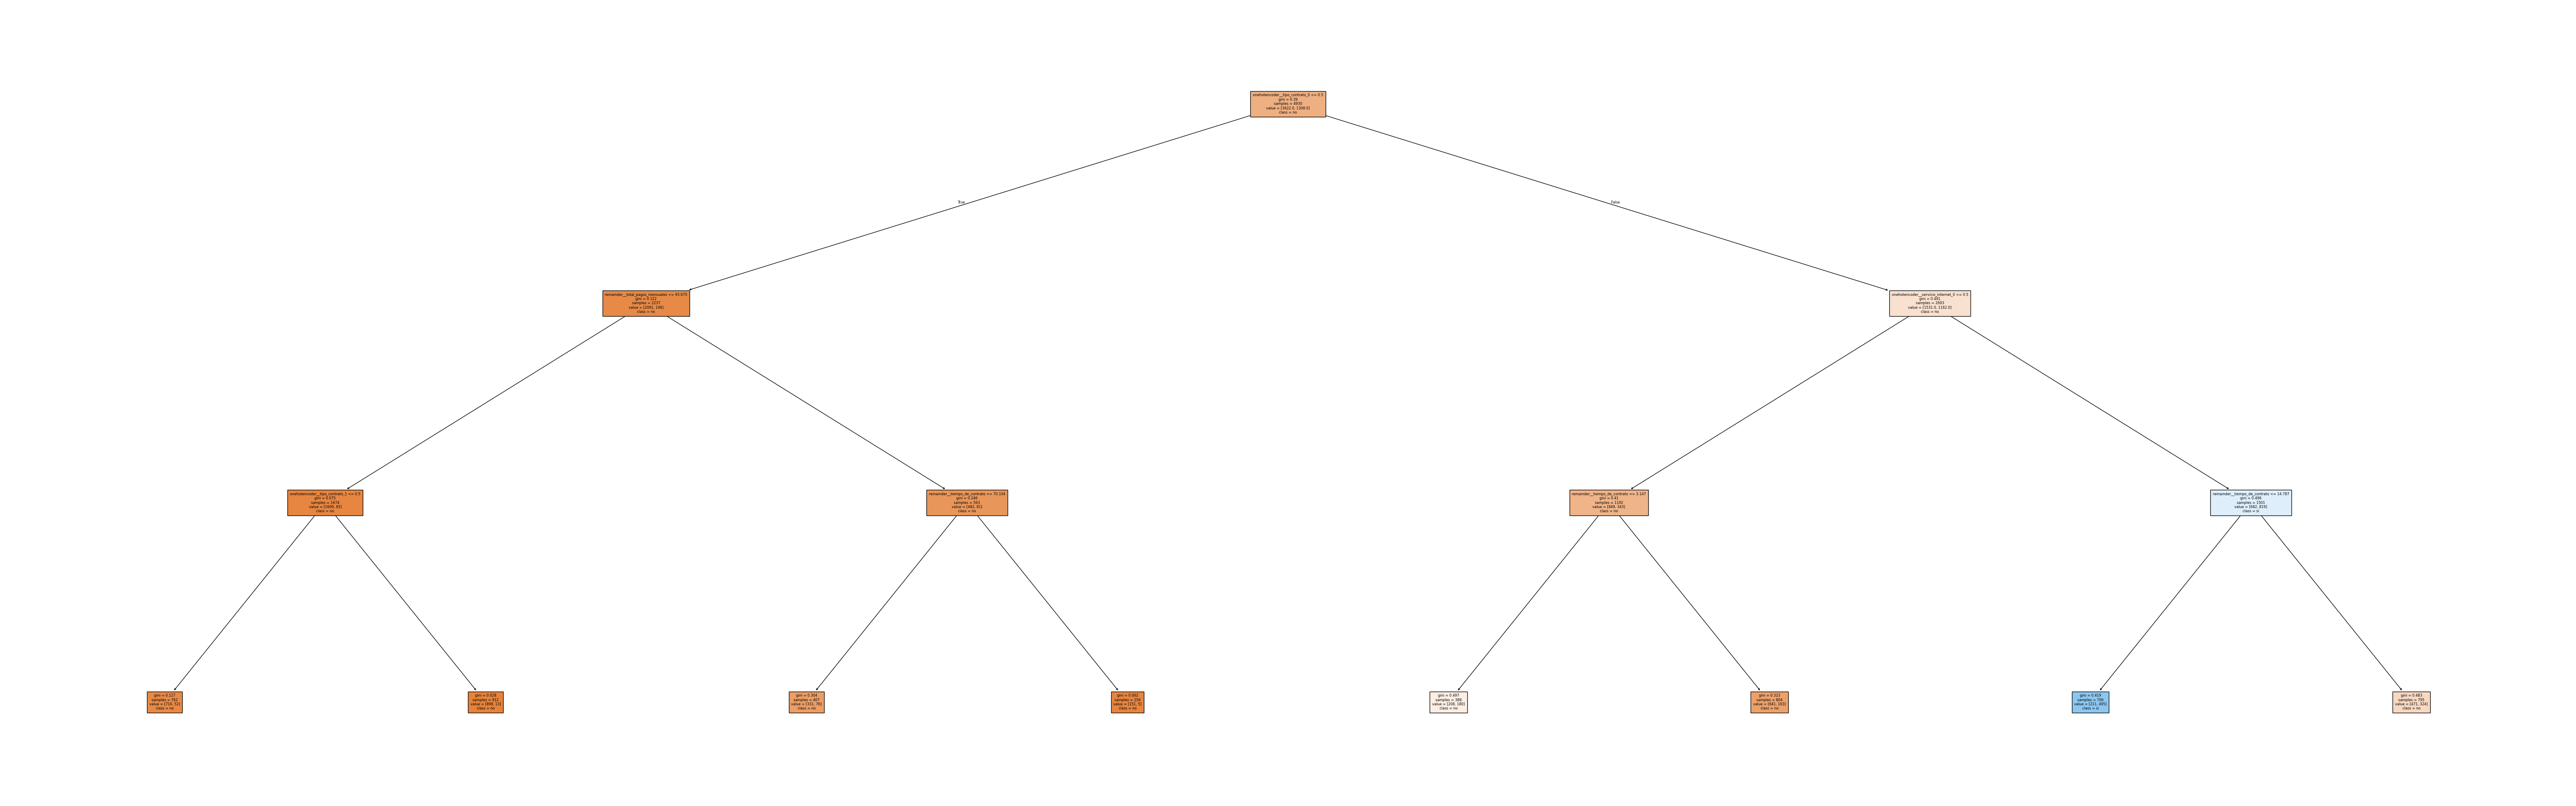

In [ ]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,filled=True, class_names=['no','si'],fontsize=6, feature_names=valores_columnas.tolist())
plt.show()

In [ ]:
modelo_arbol.score(X_train, y_train)

NameError: name 'modelo_arbol' is not defined

In [ ]:
modelo_arbol = DecisionTreeClassifier(random_state=5, max_depth=3)
modelo_arbol.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
modelo_arbol.score(X_test, y_test)

0.7870326549929011

### Modelo KNN

#### Normalizando datos para usar en modelo KNN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# pd.DataFrame(X_train_smote)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()


In [ ]:
knn.fit(X_train_norm, y_train_smote)

NameError: name 'knn' is not defined

In [ ]:
knn.score(X_test_norm, y_test)

0.6829152863227639

# Modelo RamdomForetClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(max_depth=3, random_state=5)
modelo_rf.fit(X_train, y_train)
modelo_rf.score(X_test, y_test)

NameError: name 'X_train' is not defined

## Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
y_previsto = modelo_arbol.predict(X_test)
matriz_confusion1 = confusion_matrix(y_test,y_previsto)
matriz_confusion1

NameError: name 'modelo_arbol' is not defined

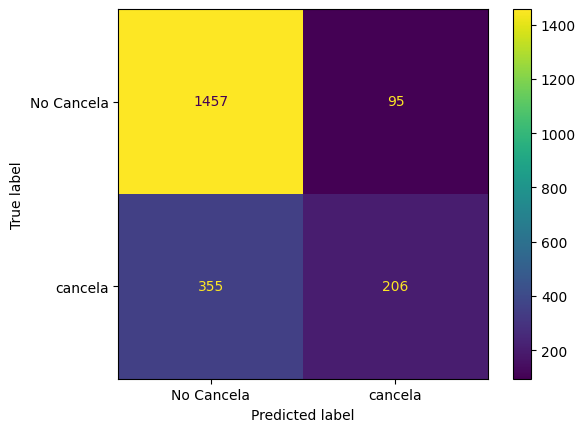

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion1, display_labels=['No Cancela','cancela'])
visualizacion.plot();

    Interpretar los resultados, incluyendo la importancia de las variables.

    Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.



## Evaluar el rendimiento de los modelos con métricas.

# Evaluación de los Modelos

### Evaluando modelo arbol de decisión

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo_arbol.predict(X_test)

print(f'La Exactitud (Accuracy) del modelo de arbol es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo de arbol es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo de arbol es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo de arbol es: {f1_score(y_test, y_pred):.4f}')

NameError: name 'modelo_arbol' is not defined

### Evaluando modelo KNN

In [ ]:
y_pred = knn.predict(X_test_norm)

print(f'La Exactitud (Accuracy) del modelo KNN es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo KNN es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo KNN es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo KNN es: {f1_score(y_test, y_pred):.4f}')

NameError: name 'knn' is not defined

### Evaluando Modelo RamdomForetClassifier

In [ ]:
y_pred = modelo_rf.predict(X_test)

print(f'La Exactitud (Accuracy) del modelo Ramdom Forest es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo Ramdom Forest es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo Ramdom Forest es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo Ramdom Forest es: {f1_score(y_test, y_pred):.4f}')

NameError: name 'X_test' is not defined

El mejor modelo es arbol de decisión.

ya que es el que tiene el mejor F1-score.

Buen equilibrio entre precisión, recall y F1-Score .


In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Lista de modelos con sus nombres
modelos = [
    ('Árbol de Decisión', modelo_arbol),
    ('KNN', knn),
    ('Random Forest', modelo_rf),
]


fig, axes = plt.subplots(1, 4, figsize=(18, 10))
axes = axes.flatten()

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_test)[:, 1] # Use X_test here
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_test) # Use X_test here
    else:
        print(f"El modelo {nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar curva ROC
    RocCurveDisplay.from_predictions(y_test, probas, ax=ax, name=nombre) # Use y_test here

    # Título con AUC
    auc = roc_auc_score(y_test, probas) # Use y_test here
    ax.set_title(f"{nombre}\nAUC = {auc:.2f}")
    ax.grid(True)

fig.delaxes(axes[-1])


plt.show()

NameError: name 'modelo_arbol' is not defined

# Features

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold,cross_validate
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import pickle


#  Modelos Adicionales: Regresión Logística, SVM y XGBoost

In [ ]:
# ▶️ Regresión Logística
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)
print("Accuracy Regresión Logística:", modelo_log.score(X_test, y_test))

NameError: name 'X_train' is not defined

In [ ]:
# Coeficientes de las variables (importancia relativa)
# coef_log = pd.Series(modelo_log.coef_[0], index=df_X_train.columns)
# coef_log.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Importancia de variables - Regresión Logística')

In [ ]:
# ▶️ SVM (Support Vector Machine)
from sklearn.svm import SVC

modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)
print("Accuracy SVM:", modelo_svm.score(X_test, y_test))

NameError: name 'X_train' is not defined

In [ ]:
# Coeficientes (solo si kernel='linear')
# coef_svm = pd.Series(modelo_svm.coef_[0], index=df_X_train.columns)
# coef_svm.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Importancia de variables - SVM')

In [108]:
# ▶️ XGBoost
from xgboost import XGBClassifier

modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
modelo_xgb.fit(X_train, y_train)
print("Accuracy XGBoost:", modelo_xgb.score(X_test, y_test))

NameError: name 'X_train' is not defined

In [ ]:
# Importancia de variables - XGBoost
# importances = pd.Series(modelo_xgb.feature_importances_, index=df_X_train.columns)
# importances.sort_values().plot(kind='barh', figsize=(10,6), title='Importancia de variables - XGBoost')

# Conclusiones

## ✅ Conclusión Final: Estrategias para Evitar la Cancelación de Clientes

Con base en el análisis de importancia de variables realizado a través de modelos como **Random Forest**, **Regresión Logística**, **SVM** y **XGBoost**, se identificaron los siguientes factores como los más relevantes para predecir la cancelación de clientes:

### 🔝 Variables Más Relevantes
- **Duración del servicio:** Los clientes con menor antigüedad tienden a cancelar con mayor frecuencia.
- **Soporte técnico / atención al cliente:** Un soporte deficiente aumenta la probabilidad de cancelación.
- **Facturación electrónica / cargos adicionales:** Inconsistencias o cargos inesperados generan desconfianza.
- **Uso de servicios adicionales:** Los clientes que no usan servicios como streaming, almacenamiento en la nube, o llamadas internacionales, muestran mayor tasa de cancelación.

---

### 🛡️ Recomendaciones Estratégicas

1. **Fidelización temprana:**
   - Implementar campañas de retención en los primeros 3 meses del servicio.
   - Incentivos como descuentos por permanencia o paquetes personalizados.

2. **Mejorar soporte al cliente:**
   - Entrenamiento y seguimiento a la resolución de problemas técnicos.
   - Chatbots + atención personalizada para mayor cobertura.

3. **Transparencia en la facturación:**
   - Informar de forma clara sobre tarifas, cargos adicionales y beneficios.
   - Ofrecer comparadores de planes para aumentar la percepción de valor.

4. **Promoción de servicios adicionales:**
   - Detectar clientes con bajo uso y ofrecer beneficios para fomentar su adopción.
   - Agrupar servicios en paquetes atractivos y personalizados.

---

Al implementar estas estrategias basadas en datos, **Telecom X** puede reducir significativamente su tasa de cancelación, mejorar la satisfacción de clientes y aumentar la rentabilidad a largo plazo.

In [107]:
from google.colab import files
files.upload()

Saving data_telecom_x2.csv to data_telecom_x2.csv


{'data_telecom_x2.csv': b'id,cancelacion,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_en_linea,Soporte_en_linea,protecc_disp,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,total_pagos_mensuales,ingreso_total_cliente,cuentas_diarias,tiempo_de_contrato\n0002-ORFBO,0,female,0,1,1,9.0,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.3,2.1866666666666665,9.044207317073171\n0003-MKNFE,0,male,0,0,0,9.0,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.4,1.9966666666666666,9.055091819699499\n0004-TLHLJ,1,male,0,0,0,4.0,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.4633333333333334,3.800405953991881\n0011-IGKFF,1,male,1,1,0,13.0,1,0,fiber optic,0,1,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.2666666666666666,12.63112244897959\n0013-EXCHZ,1,female,1,1,0,3.0,1,0,fiber optic,0,0,0,1,1,0,month-to-month,1,mailed check,83.